# Downloading and parsing GenBank files from Python

## Installation
1. Fork git repo into local machine (click on fork) and clone, or simply clone main branch with
```
git clone https://github.com/Robaina/GenBankpy.git
```
2. CD to project directory and set conda environment if not already set:
```
conda env create -n genbankpy -f environment.yml
```

3. Activate environment:
```
conda activate genbankpy
```

In [1]:
from pathlib import Path
from genbankpy.parser import GenBankFastaWriter, GBK


sp_list = [
    'Halobacterium salinarum',
    'Escherichia coli',
    'Pseudomonas aeruginosa',
    'Proteus mirabilis',
    'Klebsiella pneumoniae',
    'Prochlorococcus marinus',
    'Pelagibacter ubique'
]

gbkwriter = GenBankFastaWriter.fromSpecies(species_list=sp_list,
                                           only_latest=True,
                                           data_dir="demo_data") 

# Alternatively, if already downloaded:
# gbkwriter = GenBankFastaWriter.fromGBKdirectory(gbk_dir="demo_data")

gbkwriter.writeSequencesInFasta(
    gene_keywords={'product': ['pyruvate kinase']},
    output_fasta='demo_results/pyruvate_kinase_demo.faa', 
    sequence='protein'
)

Now we infer a phylogenetic tree using [MUSCLE](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-5-113) and [fasttree](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0009490). Results will be stored in /results/demo_tree.

Next, we visualize the infered tree with [ETE3](http://etetoolkit.org/) (not included in the provided genbankpy conda environment):

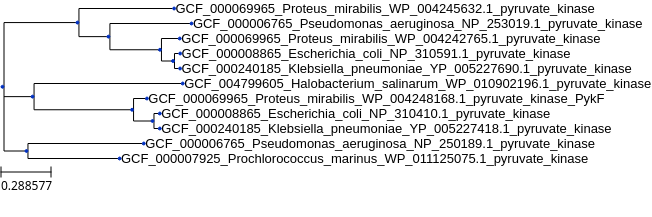

In [1]:
# Visualizing tree 
from ete3 import Tree


t = Tree("demo_results/demo_tree/ref_database.newick")
t.render("%%inline")

# Additional examples of the filtering capabilities

In [2]:
# Write fasta containing nucleotide sequences corresponding to Urease alpha
gbkwriter.writeSequencesInFasta(
    gene_keywords={'product': ['urease', 'alpha']},
    output_fasta='demo_results/ureC.fasta', 
    sequence='nucleotide'
)

# Write fasta containing peptide sequences corresponding to Urease alpha
gbkwriter.writeSequencesInFasta(
    gene_keywords={'product': ['urease', 'alpha']},
    output_fasta='demo_results/ureC.faa', 
    sequence='protein'
)

# Write fasta containing nucleotide sequences to 16S
gbkwriter.writeSequencesInFasta(
    gene_keywords={'product': ['16S']},
    output_fasta='demo_results/16s.fasta', 
    sequence='nucleotide'
)